In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

## Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
!pip install xgboost
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [421]:
df = pd.read_csv('Data_Science_Internship - Dump.csv').drop(['Unnamed: 0'], axis=1)
df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [422]:
df = df.drop(columns=['Agent_id', 'lead_id'], axis=1)

# set the columns to consider for null values
columns_to_consider = ['lost_reason', 'budget', 'lease', 'movein','source', 'source_city', 'source_country', 
                       'utm_medium','des_city', 'des_country']

# set the minimum number of non-null values required for each row to be kept
thresh = len(columns_to_consider) / 2

# remove rows where 50% of the columns being considered have null values
df = df.dropna(subset=columns_to_consider, thresh=thresh)

search_string = '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' 

# Count the number of occurrences of the string in the DataFrame
count = (df == search_string).sum().sum()

# Print the result
print(f"The string '{search_string}' occurs {count} times in the DataFrame.")

The string '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' occurs 31791 times in the DataFrame.


In [423]:
# drop rows with status other than 'WON' or 'LOST'
df = df[df['status'].isin(['WON', 'LOST'])]

# replace long strings with NaN
cols_to_exclude = ['Agent_id'] # exclude the Agent_id column
df.loc[:, ~df.columns.isin(cols_to_exclude)] = df.loc[:, ~df.columns.isin(cols_to_exclude)].apply(lambda x: x.mask(x.apply(lambda y: str(y) == search_string)))

null_perc = df.isnull().sum() / len(df) * 100
null_perc = null_perc.fillna("No Null Values")

print('The percentage of NULL Values in differenct columns are:')
null_perc

The percentage of NULL Values in differenct columns are:


status             0.000000
lost_reason        6.634713
budget             7.975473
lease              5.043505
movein            29.384459
source            12.848414
source_city       19.066433
source_country    18.615195
utm_source         0.131701
utm_medium         6.874366
des_city           5.460198
des_country        5.460198
room_type         50.717879
dtype: float64

In [424]:
df['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

C:\Users\devan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='status', ylabel='count'>

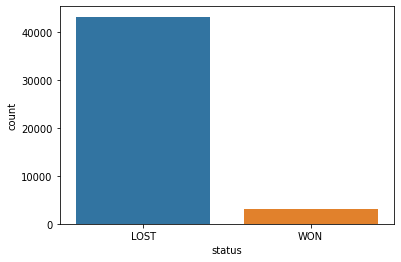

In [425]:
sns.countplot(df['status'])

In [426]:
# Now we will take care of null values in each column one by one, starting from the column 
# with highest percentage of null values.

In [427]:
df['room_type'].value_counts(normalize=True) * 100

Ensuite         54.232016
Studio          27.670201
Entire Place    18.084640
Non-Ensuite      0.008762
Twin-Studio      0.004381
Name: room_type, dtype: float64

In [428]:
# since most people opt for an 'Ensuite" room and almost 55% values are Ensuite in this column,
# we can use mode imputation.
df['room_type'] = df['room_type'].fillna("Ensuite")
#df = df.drop(['room_type'], axis =1)

In [429]:
df['movein'].describe()

count        32707
unique         469
top       10/09/22
freq          2450
Name: movein, dtype: object

In [430]:
df['movein'] = df['movein'].fillna("Unknown")

In [431]:
df['source_city'].describe()

count                                                 37486
unique                                                 4315
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   3020
Name: source_city, dtype: object

In [432]:
df['source_city'] = df['source_city'].fillna("Not_disclosed")

In [433]:
df['source_country'].describe()

count                                                 37695
unique                                                  184
top       e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...
freq                                                  18667
Name: source_country, dtype: object

In [434]:
df['source_country'].value_counts(normalize=True) * 100

e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96    49.521157
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2    18.450723
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f     5.326966
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac     2.631649
0207c236c5ad89235d814b1e1807f6fdc1930810439489f76600e1672338e42b     1.222974
                                                                      ...    
0b6e4801d2a43e3c5dc06d5b68524bd9e80e425610b531d977b5713d59df47b6     0.002653
4a89aa60736d863a5fda8aa2305e299e1c3bea690fe4775363fbf2762102b273     0.002653
b828c41f8b20d533c028d8a4e1019fe0b16bb14d4b7114a662365d08e89a1bea     0.002653
39ae135c41c0e9f97bdbe7449f5320052c6a699cbf0fcbd95dc17f6465f0d34e     0.002653
282a5dbb9d8cb1ea0caf847b5aaca66cf1a76b5e57ddbbd2dd7db8204f553c5c     0.002653
Name: source_country, Length: 184, dtype: float64

In [435]:
mode = df['source_country'].mode()[0]
df['source_country'] = df['source_country'].fillna(mode)

In [436]:
df['source'].describe()

count                                                 40366
unique                                                  682
top       7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...
freq                                                  19092
Name: source, dtype: object

In [437]:
df['source'].value_counts(normalize=True) * 100

7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8    47.297230
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916     9.398999
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b     8.883714
146fb4ecbe78caa24102bbaac12e2559a8c8e32fb116d36e3553a709fce40549     5.474905
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64     5.274241
                                                                      ...    
ab4556b4118e9689282ac334ed94636124b8d4a531e2db6c2623eb0437de1ab2     0.002477
ff25c08fc834360514f4fbc6434c2bb381ad04ea984ea86c2a0f5fb6ec94a831     0.002477
fde7c38145e98695f302f2eb113737bcf9e6b3b0ec4ab2723f4d6610cc97813f     0.002477
f4dd29fa0ded5c9ca30c96015bf8147165bfce38964c3842352d7a013b870ac9     0.002477
93bee3e177d17c128e6a6af7b88fd675d7ec729b1a88ae13c582248dfd702378     0.002477
Name: source, Length: 682, dtype: float64

In [438]:
mode = df['source'].mode()[0]
df['source'] = df['source'].fillna(mode)

In [439]:
df['budget'].describe()

count                   42623
unique                   1851
top       £60 - £120 Per week
freq                     9750
Name: budget, dtype: object

In [440]:
df['budget'] = df['budget'].fillna("Not_specified")

In [441]:
df['utm_medium'].describe()

count                                                 43133
unique                                                   63
top       09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...
freq                                                  31502
Name: utm_medium, dtype: object

In [442]:
mode = df['utm_medium'].mode()[0]
df['utm_medium'] = df['utm_medium'].fillna(mode)

In [443]:
df['lost_reason'].describe()

count                43244
unique                  30
top       Low availability
freq                  8892
Name: lost_reason, dtype: object

In [444]:
df['lost_reason'] = df['lost_reason'].fillna("lead_won")

In [445]:
df['lease'].describe()

count                                   43981
unique                                    311
top       Full Year Course Stay 40 - 44 weeks
freq                                    11000
Name: lease, dtype: object

In [446]:
df['lease'] = df['lease'].fillna("unknown")

In [447]:
df['des_city'].describe()

count                                                 43788
unique                                                  219
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   7323
Name: des_city, dtype: object

In [448]:
df['des_city'] = df['des_city'].fillna("unknown")

In [449]:
df['des_country'].describe()

count                                                 43788
unique                                                   14
top       8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
freq                                                  42391
Name: des_country, dtype: object

In [450]:
mode = df['des_country'].mode()[0]
df['des_country'] = df['des_country'].fillna(mode)

In [451]:
df['utm_source'].describe()

count                                                 46256
unique                                                   34
top       bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...
freq                                                  30873
Name: utm_source, dtype: object

In [452]:
mode = df['utm_source'].mode()[0]
df['utm_source'] = df['utm_source'].fillna(mode)

In [453]:
df.isnull().sum()

status            0
lost_reason       0
budget            0
lease             0
movein            0
source            0
source_city       0
source_country    0
utm_source        0
utm_medium        0
des_city          0
des_country       0
room_type         0
dtype: int64

In [454]:
# Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = le.fit_transform(df[col])

In [455]:
X = df.drop(['status'], axis=1)
y = df['status']

In [456]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(31032, 12)
(15285, 12)


##### Balancing the dataset using SMOTE method

In [457]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)

X_res, y_res = smt.fit_resample(X_train, Y_train)

X_res.shape

(57946, 12)

In [458]:
# importing sklearn StandardScaler class which is for Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # creating an instance of the class object
X_res_scaled = pd.DataFrame(sc.fit_transform(X_res), columns=X_res.columns)  #fit and transforming StandardScaler the dataframe 

In [487]:
from sklearn .metrics import f1_score

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_res_scaled, y_res)
y_pred = sgd.predict(X_test)
score_sgd = f1_score(y_test, y_pred, average='weighted')

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_res_scaled, y_res)
y_pred = logreg.predict(X_test)
score_log = f1_score(y_test, y_pred, average='weighted')

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_res_scaled, y_res)  
y_pred = knn.predict(X_test)  
score_knn = f1_score(y_test, y_pred, average='weighted')

gaussian = GaussianNB() 
gaussian.fit(X_res_scaled, y_res)  
y_pred = gaussian.predict(X_test)
score_gaussian = f1_score(y_test, y_pred, average='weighted')

perceptron = Perceptron(max_iter=100)
perceptron.fit(X_res_scaled, y_res)
y_pred = perceptron.predict(X_test)
score_perceptron = f1_score(y_test, y_pred, average='weighted')

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_res_scaled, y_res)  
y_pred = decision_tree.predict(X_test)  
score_decision_tree = f1_score(y_test, y_pred, average='weighted')

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_res_scaled, y_res)
y_pred = random_forest.predict(X_test)
score_random_forest = f1_score(y_test, y_pred, average='weighted')

XGBoost = XGBClassifier()
XGBoost.fit(X_res_scaled, y_res)
y_pred = XGBoost.predict(X_test)
score_XGBoost = f1_score(y_test, y_pred, average='weighted')

from sklearn.neural_network import MLPClassifier

MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_res_scaled, y_res)
y_pred = MLPClassifier.predict(X_test)
score_MLPClassifier = f1_score(y_test, y_pred, average='weighted')

# comparing all the models

results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent','Decision Tree', 'XG Boost', 'Neural Network'],
    'Weighted F1': [score_knn, score_log, score_random_forest, score_gaussian, score_perceptron, score_sgd, 
              score_decision_tree, score_XGBoost, score_MLPClassifier]})
result_df = results.sort_values(by='Weighted F1', ascending=False)
result_df = result_df.set_index('Weighted F1')
result_df

,Model
Weighted F1,
0.901629,Naive Bayes
0.862009,KNN
0.797336,Neural Network
0.073440,Logistic Regression
0.050377,Perceptron
0.035186,Random Forest
0.035186,Decision Tree
0.035186,XG Boost
0.009173,Stochastic Gradient Decent


In [488]:
from sklearn .metrics import recall_score

sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_res_scaled, y_res)
y_pred = sgd.predict(X_test)
score_sgd = recall_score(y_test, y_pred)

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_res_scaled, y_res)
y_pred = logreg.predict(X_test)
score_log = recall_score(y_test, y_pred)

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_res_scaled, y_res)  
y_pred = knn.predict(X_test)  
score_knn = recall_score(y_test, y_pred)

gaussian = GaussianNB() 
gaussian.fit(X_res_scaled, y_res)  
y_pred = gaussian.predict(X_test)
score_gaussian = recall_score(y_test, y_pred)

perceptron = Perceptron(max_iter=100)
perceptron.fit(X_res_scaled, y_res)
y_pred = perceptron.predict(X_test)
score_perceptron = recall_score(y_test, y_pred)

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_res_scaled, y_res)  
y_pred = decision_tree.predict(X_test)  
score_decision_tree = recall_score(y_test, y_pred)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_res_scaled, y_res)
y_pred = random_forest.predict(X_test)
score_random_forest = recall_score(y_test, y_pred)

XGBoost = XGBClassifier()
XGBoost.fit(X_res_scaled, y_res)
y_pred = XGBoost.predict(X_test)
score_XGBoost = recall_score(y_test, y_pred)

from sklearn.neural_network import MLPClassifier

MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_res_scaled, y_res)
y_pred = MLPClassifier.predict(X_test)
score_MLPClassifier = recall_score(y_test, y_pred)

# comparing all the models

results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression','Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent','Decision Tree', 'XG Boost', 'Neural Network'],
    'Recall': [score_knn, score_log, score_random_forest, score_gaussian, score_perceptron, score_sgd, 
              score_decision_tree, score_XGBoost, score_MLPClassifier]})
result_df = results.sort_values(by='Recall', ascending=False)
result_df = result_df.set_index('Recall')
result_df

,Model
Recall,
1.000000,Logistic Regression
1.000000,Random Forest
1.000000,Perceptron
1.000000,Stochastic Gradient Decent
1.000000,Decision Tree
1.000000,XG Boost
0.702170,Neural Network
0.241617,KNN
0.000000,Naive Bayes


In [495]:
from sklearn.neural_network import MLPClassifier

MLPClassifier = MLPClassifier()
MLPClassifier.fit(X_res_scaled, y_res)
y_pred = MLPClassifier.predict(X_test)
y_prob = MLPClassifier.predict_proba(X_test)[:, 1]

In [505]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Define the grid search object
rand_search = RandomizedSearchCV(MLPClassifier, param_distributions=param_grid, cv=5, scoring='recall')

# Fit the grid search object to the training data
rand_search.fit(X_res_scaled, y_res)

# Get the best model and evaluate on the test data
best_mlp = rand_search.best_estimator_
y_pred = best_mlp.predict(X_test)
y_prob = best_mlp.predict_proba(X_test)[:, 1]

C:\Users\devan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\devan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\devan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\devan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\devan\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [506]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print evaluation metrics
print('Accuracy: {:.4f}'.format(accuracy))
print('Precision: {:.4f}'.format(precision))
print('Recall: {:.4f}'.format(recall))
print('F1 score: {:.4f}'.format(f1))
print('AUC: {:.4f}'.format(auc))
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print('True negative: {}'.format(tn))
print('False positive: {}'.format(fp))
print('False negative: {}'.format(fn))
print('True positive: {}'.format(tp))

Accuracy: 0.5513
Precision: 0.0976
Recall: 0.6992
F1 score: 0.1713
AUC: 0.6272
Confusion matrix: 
[[7717 6554]
 [ 305  709]]
True negative: 7717
False positive: 6554
False negative: 305
True positive: 709


In [511]:
# Predict probabilities for the test set
y_pred_proba = best_mlp.predict_proba(X)[:, 1]

# Convert probabilities to scores between 0 to 100
lead_score = (y_pred_proba * 100).round(0)

# Add the 'lead_score' column to the original dataframe
df['lead_score'] = lead_score

In [514]:
df.head()

,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_score
0,0,21,1705,310,469,343,2718,165,5,10,205,8,0,0.0
1,0,16,1705,310,469,343,2718,165,5,10,74,8,0,0.0
2,0,21,1753,266,463,343,2619,165,25,3,18,8,0,0.0
3,0,16,10,2,469,507,2818,165,25,3,26,8,0,100.0
4,0,8,1705,310,469,343,2718,165,5,10,219,8,0,0.0
